In [13]:
%load_ext autoreload

In [14]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import datetime
from operator import itemgetter 
import h5py
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

import mintpy
from mintpy import view
from mintpy.utils import readfile, utils as ut 
from mintpy.objects import HDFEOS
from miaplpy.objects.invert_pixel import process_pixel 
from miaplpy.find_short_baselines import get_baselines_dict
import cartopy.io.img_tiles as cimgt


In [6]:
def read_ds(input_file):
    velocity = readfile.read(input_file, datasetName='velocity')[0]
    mask = np.ones(velocity.shape, dtype=np.int8)    
    mask = readfile.read(input_file, datasetName='mask')[0]
    
    vel = np.array(velocity[mask==1]*100)

    lat = readfile.read(input_file, datasetName='latitude')[0]
    lon = readfile.read(input_file, datasetName='longitude')[0]
    
    return lat, lon, vel

In [17]:
input_file_del_4 = 'network_delaunay_4/S1_IW2_027_0090_0092_20141031_20231008_N28391_N28598_E076970_E077230.he5'
#lat_d4, lon_d4, vel_d4 = read_ds(input_file_del_4)

In [18]:
ds = HDFEOS(input_file_del_4)
dates = ds.get_date_list()
mask = ds.read(datasetName = 'mask')
velocity = readfile.read('network_delaunay_4/geo/geo_velocity.h5', datasetName='velocity')[0]

reading mask data from file: network_delaunay_4/S1_IW2_027_0090_0092_20141031_20231008_N28391_N28598_E076970_E077230.he5 ...


In [ ]:
%matplotlib widget
cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
img = cimgt.QuadtreeTiles() # spoofed, downloaded street map
stroke = [pe.Stroke(linewidth=1, foreground='w'), pe.Normal()]
plt.close('all')
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 7), subplot_kw=dict(projection=img.crs),
                        layout="constrained")
data_crs = ccrs.PlateCarree()
# auto-calculate scale
scale = int(120/np.log(500))
scale = 19
extent = [28.391, 76.970, 28.598, 77.229]

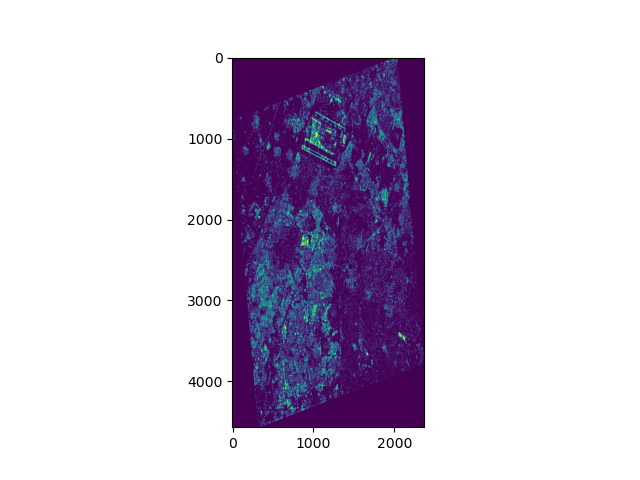

In [22]:
%matplotlib widget
plt.close()
plt.imshow(mask)
plt.show()